# Jupyter Notebook for the problem of the 1st Chapter, Recursive Algorithm, of the course of "Algorithms for optimization inference and learning".

Physics of Complex Systems, Politecnico di Torino.





--------------------------------------------------------------------------------------------------------------
 
Chapter 1: recursion
 
--------------------------------------------------------------------------------------------------------------

All functions implementing the algorithms are coded in the file *recursive.jl*

In [1]:
#Header files needed

using Plots;
#using PyPlot;
include("recursion.jl");

- Problem 3 (Sierpinski’s triangle)

Design a recursion to produce plot in Figure 1.1 (on the book).
(Hint: using a recursive function, produce vectors $p_x$, $p_y$ with respectively $x$ an $y$ coordinates of endpoints of your polygons using, separated by $NaN$ values. Then plot it.)





recursion.jl $\rightarrow$ function *s_triangle()*

In [2]:
p_x, p_y = s_triangle(128)[1], s_triangle(128)[2];

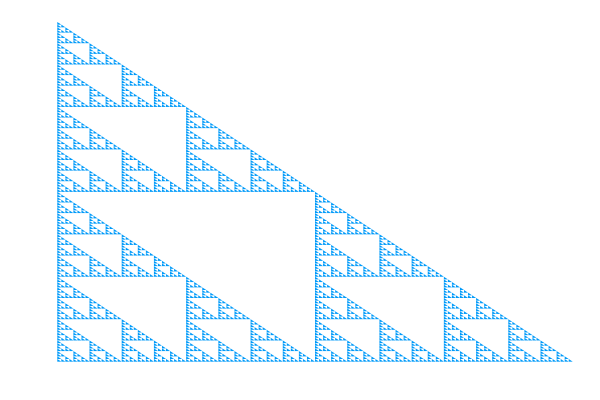

In [3]:
gr();
plot(p_x,p_y,seriestype=:shape,linewidth=-1,grid=false,axis=false,label=false)

In the solution that I've proposed, there is a problem related to the dimension of the triangle: it works well if the dimension $x$ is a power of 2, $x=2^n$, otherwise the algorithm doesn't work well. I know that the problem is in the part related to the recursive calls (I use to apply the recursive call to each part of dimension $\frac{x}{2}$, iterating the halving). I'll try to fix this.

- Problem 7 (In-place Quick Sort)

Design a recursive algorithm version (in-place) for the Quick Sort, in which arguments are the indices $(i,dim)$ into the original vector.

recursion.jl $\rightarrow$ function *qsort()*

In [4]:
V_1 = rand(1000);

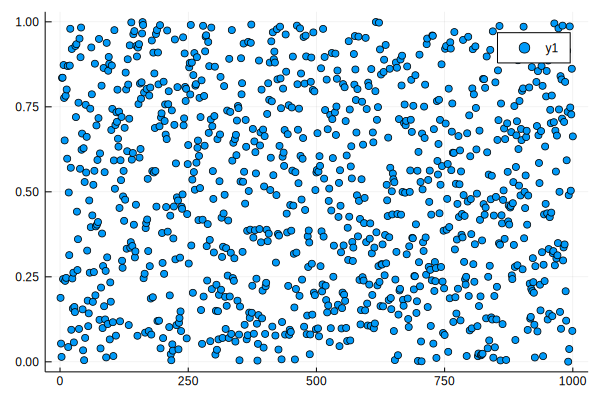

In [5]:
plot(V_1, seriestype = :scatter)

In [6]:
V_2 = qsort(V_1);

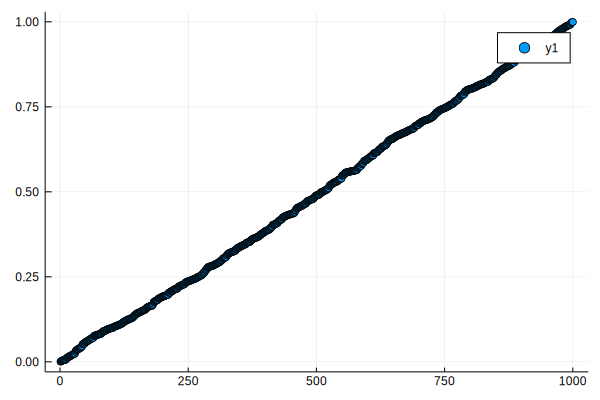

In [7]:
plot(V_2, seriestype = :scatter)

- Problem 8 (Computing the arg)

How can we extend the recursion in *Example 4* to compute the actual values $(i^*, j^*)$, the argument of the $max$ ?

*Example 4 (Maximum sub-array problem)*: Given an array of numbers $v_1,\dots,v_n$, find $i,j$ such that $\sum_{k=i}^jv_k$ is maximum. Since it is problematic to design a recursive algorithm to solve the problem, we will "generalize" or "enrich" a bit our problem. Call $M_j = \max \left\{ \sum_{i\leq k \leq j} v_k : i\leq j+1 \right\}$ the maximum sum ending in $v_j$, with the convention that $\sum_\emptyset = 0$. It is clear that $M_j$ obeys the recursion $M_j = v_j + \max \left\{ M_{j-1} ,0 \right\}$. One we computed all values of $M_j$ (computational complexity $O(n)$) we can compute our maximum as $R_j = \max_{i \leq j} M_j$ (again in computational complexity $O(n)$).

recursion.jl $\rightarrow$ function *max_sum()*

In [8]:
V_3=rand(-100:100, 10)

10-element Array{Int64,1}:
 -24
  37
  74
  10
 -79
 -71
 -82
  64
 -80
 -75

In [9]:
max_sum(V_3)

111

recursion.jl $\rightarrow$ function *max_sum_ind()*

In [10]:
max_sum_ind(V_3)

(111, 2, 3)

 - Problem 9 (Two-dimensional maximum subarray)

Formulate and solve a two-dimensional variant of Example 4.

In a $2$-dimensional variant of *Example 4*, given a matrix of numbers $$v = \begin{bmatrix}
v_{11} & v_{12} \\
\vdots & \vdots \\
v_{n1} & v_{n2} \\
\end{bmatrix},$$ find $i,j$ such that $\sum_{k=i}^{j}v_{k k'},\ \text{where}\ k' = 1,2$, is maximum. Since we are in the $2$-dimensional case, so there are some "restrictions": we can find the "neighbors" on the $1$-st column, on the $2$-nd one or in one of $n$-rows of the matrix.

recursion.jl $\rightarrow$ function *max_sum_2d()*

In [11]:
V_4=rand(-100:100,10,2)

10×2 Array{Int64,2}:
 -20  -90
 -77  -91
 -60  -45
 -27  -14
  64    8
  74  -73
 -75   74
  63   99
  53   76
  90   69

In [12]:
max_sum_2d(V_4)

175

- Problem 10 (Divide-and-Conquer maximum subarray)

When possible, a binary division of the problem as in MergeSort may be preferable to tail recursion, as the computation can be parallelized on a computer. Instead of tail recursion, devise a binary divide-and-conquer approach to solve *Example 4*.

recursion.jl $\rightarrow$ function *max_sum_bin()*

In [13]:
V_5 = rand(-100:100,10)

10-element Array{Int64,1}:
 -92
 -29
  41
 -59
  70
  86
 -84
 -17
 -60
 -37

In [14]:
max_sum_bin(V_5), max_sum(V_5)

(156, 156)

- Problem 11 (Recursive subsets)


Design a recursive function to print the $b$-subsets of $\{1,\dots,n\}$ of size $k$, where $b$ is the binomial $(n,k)$.

Let's consider the starting set of elements $v = \{1,...,n\}$. The idea is to choose an element among the $n$-ones and delete it from the set $v$. So, it's needed to repeat this procedure $k$-times, in order to have the first substet $b_1 \subset v=\{1,...,n\}$ given by $k$-random elements. This should be iterated while there are elements in the modified set.
After this, we must pass to the second element of the starting set $v = \{1,...,n\}$, in order to do the same as above. In this way, it's possible to solve the problem?

recursion.jl $\rightarrow$ function *fsubs()* in function *rec_subs()*

In [15]:
n, k = 4, 2

(4, 2)

In [16]:
rec_subs(n, k)

6 subsets:

[1, 2]
[1, 3]
[1, 4]
[2, 2]
[2, 3]
[2, 4]
[3, 2]
[3, 3]
[3, 4]


- Problem 12 (Growing subsequences)

Given an array of numbers $\{v_1, \dots, v_{n-1}\}$, find the maximum $k$ such that there exists $\pi:0\leq \pi_1 \leq \dots \leq \pi_k \leq n-1$ with $v_{\pi_1} \leq \dots \leq v_{\pi_k}$.

In [17]:
V_6=rand(-10:10,10)

10-element Array{Int64,1}:
  8
  9
  9
 -1
 -4
  0
 -2
 -9
 -5
  3

In [18]:
max_ind(V_6)

Element: 9 -> position: 3


- Problem 13 (The $k$-th largest element on a list)

Given $\{v_1, \dots, v_n\}\in\mathbb{R}$, let $\pi$ be a sorting permutation, i.e. $\pi_1,\dots,\pi_n \ \in \{1,\dots,n\}$, with $\pi_i \neq \pi_j$ if $i \neq j$ such that $v_{\pi_1} \geq v_{\pi_2} \geq \dots \geq v_{\pi_n}$.

Given $k\ \in {1,\dots, n}$, consider the problem of finding $v_{\pi_k}$. A simple way of finding $v_{\pi_k}$ is to sort the list in decreasing order,and just take the $k$-th element. This can be performed in $O(n \log{n})$ time. However, it is clear that for e.g. $k = 1$ or $k = n$ one can do it in $O(n)$ time by just looking for the largest or smallest element in one single pass (and this generalizes to any finite $k$ or $n − k$). What about intermediate values of $k$?

1. Design a recursion to compute $v_{\pi_k}$ in average time $O(n)$ (constant independent of $k$). Once you devise your procedure, find an explicit recursion for the (average) computation time $T_n$ and show that $T_n = O (n)$. *Hint*: assume $T (k) \leq \alpha k$ for $k \leq n$ and find a suitable $\alpha$ (independent of $n$) such that also $T (n + 1) \leq \alpha (n + 1)$.
*Hint*: think about QuickSort after splitting the list around the pivot: in which half $v_{\pi_k$ will be?

2. Show that the (unordered) set $M_k(v_1,\dots,v_n)=\{\pi_1,\dots,\pi_k\}$ can also be found in time $O (n)$.